<h1 style="text-align:center;">Assignment 2</h1>

<div class="alert alert-block alert-info" style="text-align:center;">
    <p style="text-align:center;"><b>Part 2.1:</b> Briefly describe how gradient boosting differs from bagging.</p>
</div>

#### Table of Contents:

1. [Bagging](#1.-Bagging)
2. [Boosting](#2.-Boosting)
3. [Difference Bagging Vs Boosting](#3.-Difference-Bagging-Vs-Boosting)


<div class="alert alert-block alert-info" style="text-align:center;">
    <p style="text-align:center;"><b>Part 2.2:</b> Implement gradient boosting as invoked in scikit-learn, and evaluate classifier accuracy for the Titanic dataset.</p>
</div>

#### Table of Contents:

1. [Library Imports](#1.-Library-Imports)  
2. [Read Dataset](#2.-Read-Dataset)  
3. [Split Dataset](#3.-Split-Dataset)  
4. [Pre-Processing](#4.-Pre-Processing)  
5. [Gradient Boosting - Hyperparameter Tuning](#5.-Gradient-Boosting---Hyperparameter-Tuning)  
6. [Conclusion](#6.-Conclusion) 

---

<div class="alert alert-block alert-info" style="text-align:center;">
    <p style="text-align:center;"><b>Part 2.1:</b> Briefly describe how gradient boosting differs from bagging.</p>
</div>

### 1. **Bagging**

**Definition:**

Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we get an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree classifier.

**Bagging Steps:**

- Suppose there are N observations and M features in training data set. A sample from training data set is taken randomly with replacement.
- A subset of M features are selected randomly and whichever feature gives the best split is used to split the node iteratively.
- The tree is grown to the largest.
- Above steps are repeated n times and prediction is given based on the aggregation of predictions from n number of trees.

**Advantages:**

- Reduces over-fitting of the model.
- Handles higher dimensionality data very well.
- Maintains accuracy for missing data.

**Disadvantages:**

- Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the classification and regression model.

[Scroll Top](#Assignment-2)

---

### 2. **Boosting**

**Definition:**

Boosting is used to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analysing data for errors. Consecutive trees (random sample) are fit and at every step, the goal is to improve the accuracy from the prior tree. When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. This process converts weak learners into better performing model.

**Bagging Steps:**

- Draw a random subset of training samples d1 without replacement from the training set D to train a weak learner C1
- Draw second random training subset d2 without replacement from the training set and add 50 percent of the samples that were previously falsely classified/misclassified to train a weak learner C2
- Find the training samples d3 in the training set D on which C1 and C2 disagree to train a third weak learner C3
- Combine all the weak learners via majority voting.

**Advantages:**

- Supports different loss function (we have used ‘binary:logistic’ for this example).
- Works well with interactions.

**Disadvantages:**

- Prone to over-fitting.
- Requires careful tuning of different hyper-parameters.

[Scroll Top](#Assignment-2)

---

### 3. **Difference Bagging Vs Boosting**


|   	|Bagging|Boosting   	|
|:---	|:---	|:---|
|Partitioning of data|Random   	|Higher vote to misclassified samples   	|
|Goal to achieve|Minimum variance   	|Increase accuracy   	|
|Methods used|Random subspace   	|Gradient descent   	|
|Functions to combine single model|Weighted average   	|Weighted majority vote   	|
|Example   	|Random Forest   	|Ada Boost   	|

[Scroll Top](#Assignment-2)

---

<div class="alert alert-block alert-info" style="text-align:center;">
    <p style="text-align:center;"><b>Part 2.2:</b> Implement gradient boosting as invoked in scikit-learn, and evaluate classifier accuracy for the Titanic dataset.</p>
</div>

### 1. Library Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Commenting for Git, providign direct path 
#%pwd

In [3]:
# Commenting for Git, providign direct path 
#my_path = 'C:\\Users\\srush\\Documents\\Srushti NEU\\Full Summer 2020\\INFO 6105 Data Science Engineering Methods and Tools\\Assignment\\Assignment 2'

[Scroll Top](#Assignment-2)

---

### 2. Read Dataset

In [4]:
df = pd.read_csv('DataSet/Titanic_full.csv')
print(df.shape)
df.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Correlation')

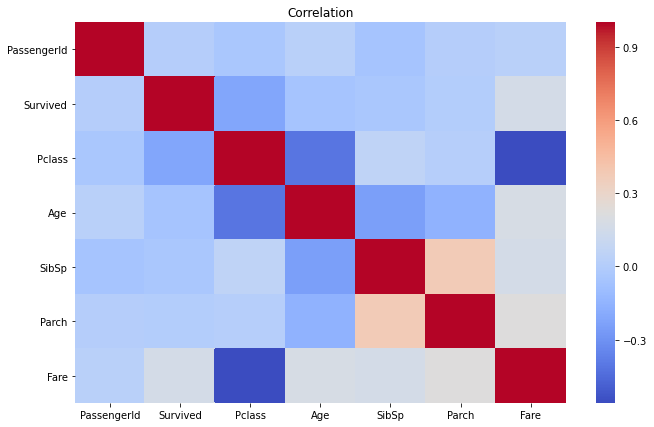

In [5]:
#Correlation graph shows Fare column is more close to Survived

plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


[Scroll Top](#Assignment-2)

---

### 3. Split Dataset

In [7]:
# Split the dataset Vertically taking the dependent feature as y_train.

y_train = df["Survived"]
df.drop(labels="Survived", axis=1, inplace=True)

[Scroll Top](#Assignment-2)

---

### 4. Pre-Processing

In [8]:
# As per correlation map we can drop extra unwanted columns.

drop_columns = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
df.drop(labels=drop_columns, axis=1, inplace=True)

In [9]:
# Any text data needs to be converted into numbers so that our model can use and filling empty places with 0.

df = pd.get_dummies(df, columns=["Sex"])
df.fillna(value=0.0, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Fare           1309 non-null float64
Sex_female     1309 non-null uint8
Sex_male       1309 non-null uint8
dtypes: float64(1), int64(2), uint8(2)
memory usage: 33.4 KB


In [11]:
# Splitting datase set in training and testing (horizontally)

X_train = df.values[0:891]
X_test = df.values[891:]

y_train = y_train.values[0:891]
#y_test = y_train.values[891:]
#X_train, X_test = mydf_splitter(df,1390)

print(X_train.shape,X_test.shape)

(891, 5) (418, 5)


In [12]:
# Scaling Dataset

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Splitting training data in validation and training

state = 12  
test_size = 0.30  

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=test_size, random_state=state)

[Scroll Top](#Assignment-2)

---

### 5. Gradient Boosting - Hyperparameter Tuning

In [14]:
# Testing different learning rates, so that we can compare the performance of the classifier's performance 
# at different learning rates.

learning_rate = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rate:
    gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_features=2, max_depth=2, 
                                        random_state=0)
    gbc.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbc.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.831
Accuracy score (validation): 0.757
Learning rate:  0.075
Accuracy score (training): 0.835
Accuracy score (validation): 0.757
Learning rate:  0.1
Accuracy score (training): 0.836
Accuracy score (validation): 0.757
Learning rate:  0.25
Accuracy score (training): 0.880
Accuracy score (validation): 0.772
Learning rate:  0.5
Accuracy score (training): 0.889
Accuracy score (validation): 0.787
Learning rate:  0.75
Accuracy score (training): 0.899
Accuracy score (validation): 0.772
Learning rate:  1
Accuracy score (training): 0.912
Accuracy score (validation): 0.750


#### We found learning rate of 0.5 gives us the best performance on the validation set and good performance on the training set.
- Learning rate:  0.5
- Accuracy score (training): 0.889
- Accuracy score (testing): 0.787

[Scroll Top](#Assignment-2)

---

### 6. Conclusion

In [15]:
# Evaluate the classifier by checking its accuracy and creating a confusion matrix with the hyperparameter we found.

gbc2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gbc2.fit(X_train, y_train)
predictions = gbc2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("\nClassification Report:")
print(classification_report(y_val, predictions))

score = gbc2.score(X_val, y_val)
print("\nAccuracy Score")
print(score)

Confusion Matrix:
[[142  19]
 [ 38  69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       161
           1       0.78      0.64      0.71       107

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268


Accuracy Score
0.7873134328358209


[Scroll Top](#Assignment-2)

---

<div class="alert alert-block alert-info">
    <b>Copyright</b> 2020 Srushti Dhamangaonkar<br>
    <br>Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
    <br>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
    <br>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    <br><br>
    
<div class="text-center">
    <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br>
</div></div>